In [1]:
#load the saved matrices
import pickle
train_X=pickle.load(open( "di_sc_train_x.p", "rb" ) )
test_X=pickle.load(open( "di_sc_test_x.p", "rb" ) )
train_Y=pickle.load(open( "di_sc_train_y.p", "rb" ) )
test_Y=pickle.load(open( "di_sc_test_y.p", "rb" ) )
mean_arr=pickle.load(open( "di_sc_mean.p", "rb" ) )
mean_std=pickle.load(open( "di_sc_std.p", "rb" ) )

In [2]:
#import keras and numpy
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
#this list the devices, just making sure there is a GPU present, you might be fine with no GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4070211978103841789
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15595618304
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7636397734853388528
physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0"
]


In [4]:
#model with 2 leyers of 100 LSTM neurons
model = Sequential()
opt=Adam(lr=0.007, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.add(Dense(32, input_dim=32, kernel_initializer='random_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               6600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total para

In [6]:
model.fit(train_X, train_Y, epochs=200, batch_size=1000,verbose=1)

Epoch 1/200
25000/25000 [==============================] - 1s 33us/step - loss: 1.6558 - acc: 0.4382
Epoch 2/200
25000/25000 [==============================] - 0s 9us/step - loss: 1.3455 - acc: 0.5488
Epoch 3/200
25000/25000 [==============================] - 0s 9us/step - loss: 1.2730 - acc: 0.5703
Epoch 4/200
25000/25000 [==============================] - 0s 9us/step - loss: 1.2285 - acc: 0.5866
Epoch 5/200
25000/25000 [==============================] - 0s 9us/step - loss: 1.1902 - acc: 0.5962
Epoch 6/200
25000/25000 [==============================] - 0s 9us/step - loss: 1.1635 - acc: 0.6024
Epoch 7/200
25000/25000 [==============================] - 0s 9us/step - loss: 1.1551 - acc: 0.6080
Epoch 8/200
25000/25000 [==============================] - 0s 9us/step - loss: 1.1310 - acc: 0.6196
Epoch 9/200
25000/25000 [==============================] - 0s 9us/step - loss: 1.1178 - acc: 0.6220
Epoch 10/200
25000/25000 [==============================] - 0s 9us/step - loss: 1.1171 - acc: 0.622

25000/25000 [==============================] - 0s 9us/step - loss: 0.9330 - acc: 0.6785
Epoch 83/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9421 - acc: 0.6757
Epoch 84/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9449 - acc: 0.6738
Epoch 85/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9364 - acc: 0.6780
Epoch 86/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9518 - acc: 0.6730
Epoch 87/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9539 - acc: 0.6732
Epoch 88/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9439 - acc: 0.6720
Epoch 89/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9469 - acc: 0.6734
Epoch 90/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9448 - acc: 0.6745
Epoch 91/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9358 - acc: 0.6754
Epo

25000/25000 [==============================] - 0s 9us/step - loss: 0.9163 - acc: 0.6864
Epoch 163/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9143 - acc: 0.6821
Epoch 164/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9141 - acc: 0.6836
Epoch 165/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9130 - acc: 0.6834
Epoch 166/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9105 - acc: 0.6840
Epoch 167/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9150 - acc: 0.6843
Epoch 168/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9259 - acc: 0.6827
Epoch 169/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9191 - acc: 0.6810
Epoch 170/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9181 - acc: 0.6839
Epoch 171/200
25000/25000 [==============================] - 0s 9us/step - loss: 0.9103 - acc: 0

In [7]:
scores = model.evaluate(test_X, test_Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

675/675 [==============================] - 0s 112us/step
Accuracy: 70.52%


In [10]:
from sklearn.metrics import classification_report


test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
test_Y_predicted = model.predict_classes(test_X)
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
#print (test_Y_index)

                   precision    recall  f1-score   support

          0       0.76      0.85      0.80       100
          1       0.80      0.71      0.75        45
          2       0.71      0.68      0.69       100
          3       0.71      0.86      0.78        51
          4       0.83      0.70      0.76        50
          5       0.86      0.66      0.75        85
          6       0.39      0.53      0.45        73
          7       0.65      0.64      0.65        47
          8       0.41      0.30      0.34        44
          9       0.94      0.93      0.93        80

avg / total       0.72      0.71      0.71       675



In [40]:
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]
print(zz)
print(sample_w)
print()

Counter({2: 111, 0: 96, 6: 86, 5: 82, 9: 69, 3: 56, 7: 47, 1: 44, 4: 43, 8: 41})
[96, 44, 111, 56, 43, 82, 86, 47, 41, 69]



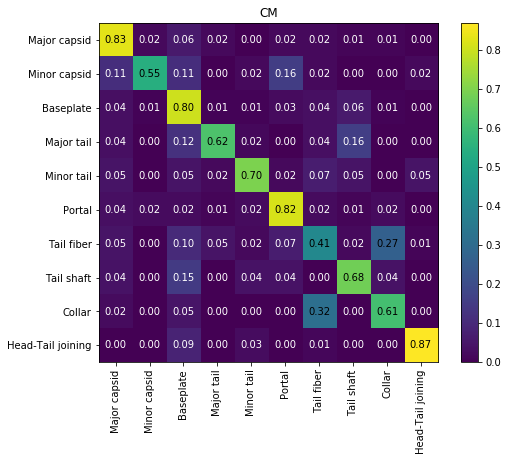

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.3
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y_index, test_Y_predicted ))


[[85  1  3  2  0  3  3  1  0  2]
 [ 4 32  2  2  1  3  1  0  0  0]
 [ 4  1 68  1  2  1 14  7  1  1]
 [ 0  0  1 44  0  1  3  2  0  0]
 [ 2  0  1  2 35  0  6  2  1  1]
 [ 6  4  6  2  1 56  5  3  1  1]
 [ 3  1  6  5  2  0 39  1 16  0]
 [ 5  1  3  2  0  1  5 30  0  0]
 [ 3  0  2  1  0  0 25  0 13  0]
 [ 0  0  4  1  1  0  0  0  0 74]]


In [9]:
#you can save the as a file so you dont have to train it every time
model.save('di_sc_model.h5')